In [1]:
from sklearn import tree
import pandas as pd
import os
import matplotlib.pyplot as plt
import plotly.plotly as py 
from datetime import timedelta
import datetime
from fbprophet import Prophet

In [8]:
df = pd.read_csv(os.path.join("weekly_final_data.csv"))

In [9]:
df.head()

,Unnamed: 0,Unnamed: 0.1,air_area_name,genre_name,visitors,current_week,latitude,longitude
0,0,0,Tōkyō-to Minato-ku Shibakōen,Japanese food,2069,0,35.658068,139.751599
1,1,1,Tōkyō-to Minato-ku Shibakōen,Japanese food,2092,1,35.658068,139.751599
2,2,2,Tōkyō-to Minato-ku Shibakōen,Japanese food,2095,2,35.658068,139.751599
3,3,3,Tōkyō-to Minato-ku Shibakōen,Japanese food,1999,3,35.658068,139.751599
4,4,4,Tōkyō-to Minato-ku Shibakōen,Japanese food,1983,4,35.658068,139.751599


In [10]:
df = df.drop(columns = ['Unnamed: 0', 'Unnamed: 0.1'])
df.head()

,air_area_name,genre_name,visitors,current_week,latitude,longitude
0,Tōkyō-to Minato-ku Shibakōen,Japanese food,2069,0,35.658068,139.751599
1,Tōkyō-to Minato-ku Shibakōen,Japanese food,2092,1,35.658068,139.751599
2,Tōkyō-to Minato-ku Shibakōen,Japanese food,2095,2,35.658068,139.751599
3,Tōkyō-to Minato-ku Shibakōen,Japanese food,1999,3,35.658068,139.751599
4,Tōkyō-to Minato-ku Shibakōen,Japanese food,1983,4,35.658068,139.751599


In [12]:
area_array = list(df["air_area_name"].unique())
len(area_array)

78

In [14]:
first = area_array[0]

In [17]:
ds = []
y = []
ds_predict = []
y_predict = []

for index, row in df.iterrows():
    if row['air_area_name'] == first:
        ds.append(row['current_week'])
        y.append(row['visitors'])

In [57]:
Fukuoka = ({
    "ds1": ds,
    "y": y
})
df =pd.DataFrame.from_dict(Fukuoka)

In [58]:
import time
# week = 6
year = 2016
atime = []
for w in df['ds1']:
    if w < 49:
        week = (w + 3)
        atime.append(time.asctime(time.strptime('{} {} 1'.format(year, week), '%Y %W %w')))
    else:
        week = (w - 49)
        year = 2017
        atime.append(time.asctime(time.strptime('{} {} 1'.format(year, week), '%Y %W %w')))
atime

['Mon Jan 18 00:00:00 2016',
 'Mon Jan 25 00:00:00 2016',
 'Mon Feb  1 00:00:00 2016',
 'Mon Feb  8 00:00:00 2016',
 'Mon Feb 15 00:00:00 2016',
 'Mon Feb 22 00:00:00 2016',
 'Mon Feb 29 00:00:00 2016',
 'Mon Mar  7 00:00:00 2016',
 'Mon Mar 14 00:00:00 2016',
 'Mon Mar 21 00:00:00 2016',
 'Mon Mar 28 00:00:00 2016',
 'Mon Apr  4 00:00:00 2016',
 'Mon Apr 11 00:00:00 2016',
 'Mon Apr 18 00:00:00 2016',
 'Mon Apr 25 00:00:00 2016',
 'Mon May  2 00:00:00 2016',
 'Mon May  9 00:00:00 2016',
 'Mon May 16 00:00:00 2016',
 'Mon May 23 00:00:00 2016',
 'Mon May 30 00:00:00 2016',
 'Mon Jun  6 00:00:00 2016',
 'Mon Jun 13 00:00:00 2016',
 'Mon Jun 20 00:00:00 2016',
 'Mon Jun 27 00:00:00 2016',
 'Mon Jul  4 00:00:00 2016',
 'Mon Jul 11 00:00:00 2016',
 'Mon Jul 18 00:00:00 2016',
 'Mon Jul 25 00:00:00 2016',
 'Mon Aug  1 00:00:00 2016',
 'Mon Aug  8 00:00:00 2016',
 'Mon Aug 15 00:00:00 2016',
 'Mon Aug 22 00:00:00 2016',
 'Mon Aug 29 00:00:00 2016',
 'Mon Sep  5 00:00:00 2016',
 'Mon Sep 12 0

In [64]:
df['ds'] = atime
df.head()

,ds1,y,ds
0,0,2069,Mon Jan 18 00:00:00 2016
1,1,2092,Mon Jan 25 00:00:00 2016
2,2,2095,Mon Feb 1 00:00:00 2016
3,3,1999,Mon Feb 8 00:00:00 2016
4,4,1983,Mon Feb 15 00:00:00 2016


In [65]:
Fukuoka = ({
    "ds": atime,
    "y": y
})
df =pd.DataFrame.from_dict(Fukuoka)

In [72]:
df

,ds,y
0,Mon Jan 18 00:00:00 2016,2069
1,Mon Jan 25 00:00:00 2016,2092
2,Mon Feb 1 00:00:00 2016,2095
3,Mon Feb 8 00:00:00 2016,1999
4,Mon Feb 15 00:00:00 2016,1983
5,Mon Feb 22 00:00:00 2016,2127
6,Mon Feb 29 00:00:00 2016,2118
7,Mon Mar 7 00:00:00 2016,2085
8,Mon Mar 14 00:00:00 2016,2121
9,Mon Mar 21 00:00:00 2016,2157


In [77]:
m1 = Prophet(daily_seasonality= True, weekly_seasonality = True)
m1.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [82]:
future1 = m1.make_future_dataframe(periods=1)
forecast1 = m1.predict(future1)
forecast1.tail().T

,49,50,51,52,53
ds,2016-12-26 00:00:00,2017-01-02 00:00:00,2017-01-09 00:00:00,2017-01-16 00:00:00,2017-01-17 00:00:00
trend,5657.83,5772.37,5886.92,6001.46,6017.82
yhat_lower,5455.35,5608.64,5686.22,5970.17,5185.72
yhat_upper,8388.79,8401.67,8513.68,8673.77,8000.8
trend_lower,5657.83,5772.37,5886.92,6001.46,6017.82
trend_upper,5657.83,5772.37,5886.92,6001.46,6017.82
additive_terms,1260.85,1260.85,1260.85,1260.85,630.424
additive_terms_lower,1260.85,1260.85,1260.85,1260.85,630.424
additive_terms_upper,1260.85,1260.85,1260.85,1260.85,630.424
daily,720.484,720.484,720.484,720.484,720.484


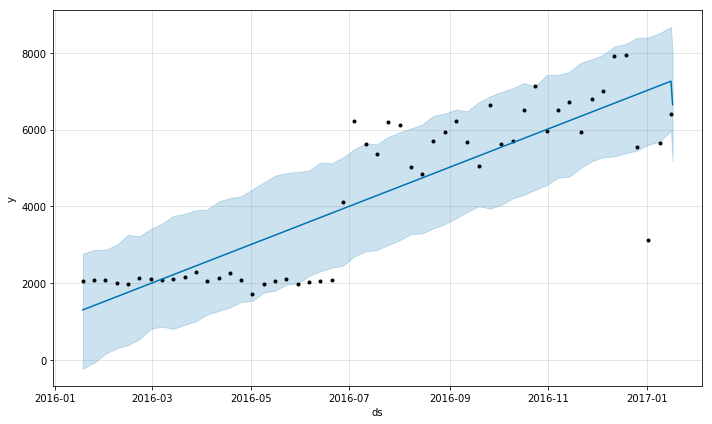

In [83]:
m1.plot(forecast1);


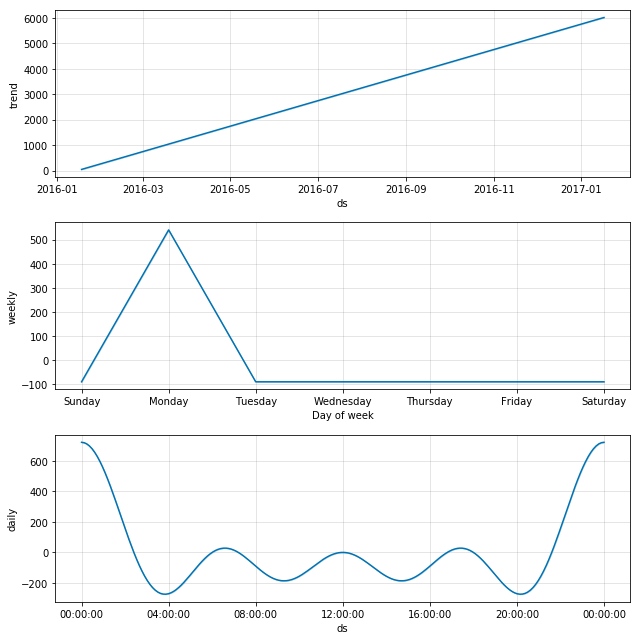

In [84]:
m1.plot_components(forecast1);

In [94]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(m1, initial='300 days', period='1 days', horizon = '1 days')
df_cv

INFO:fbprophet:Making 10 forecasts with cutoffs between 2016-11-13 00:00:00 and 2017-01-15 00:00:00
C:\Users\ejohn\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2016-11-14,6791.475736,5709.071681,8064.278537,6729,2016-11-13
1,2016-11-21,6927.316358,5692.855928,8047.723253,5939,2016-11-20
2,2016-11-28,6979.334780,5764.984509,8202.787902,6794,2016-11-27
3,2016-12-05,7092.816214,5995.990898,8226.391390,7004,2016-12-04
4,2016-12-12,7218.249504,6033.002857,8351.038418,7917,2016-12-11
5,2016-12-19,7407.323133,6240.339159,8645.733227,7952,2016-12-18
6,2016-12-26,7587.530901,6492.150371,8658.786009,5554,2016-12-25
7,2017-01-02,7574.424075,6292.975918,8768.494262,3137,2017-01-01
8,2017-01-09,7339.499462,6018.351961,8698.339980,5654,2017-01-08
9,2017-01-16,7329.684430,5913.484933,8726.531687,6404,2017-01-15


In [92]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [95]:
r2_score(df_cv.y, df_cv.yhat)

-0.6870515457981923